In [1]:
# Packages imports

import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi


In [2]:
# Import the dataset named "Golbox clean Data" and display top few rows, the dataframe names as "golbox"

golbox = pd.read_csv('Golbox clean Data.csv')
             
golbox.head()

,user_id,country,continent,gender,user_group,user_join_date,user_device,purchase_date,total_spent
0,1024678,USA,North America,O,A,2023-01-31,I,0,0.0
1,1014029,USA,North America,M,A,2023-01-30,A,0,0.0
2,1001504,FRA,EU,NaN,A,2023-01-26,A,0,0.0
3,1015801,USA,North America,M,A,2023-01-25,NaN,0,0.0
4,1014017,BRA,SA,NaN,A,2023-02-04,I,0,0.0


In [3]:
# Total number of rows and columns 
golbox.shape

(49082, 9)

In [4]:
# Information about each columns
golbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49082 entries, 0 to 49081
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         49082 non-null  int64  
 1   country         48435 non-null  object 
 2   continent       49082 non-null  object 
 3   gender          42200 non-null  object 
 4   user_group      49082 non-null  object 
 5   user_join_date  49082 non-null  object 
 6   user_device     48787 non-null  object 
 7   purchase_date   49082 non-null  object 
 8   total_spent     49082 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [5]:
# Identify total null values in each cloumn
# Country, gender and user_device has nulls
golbox.isnull().sum()

user_id              0
country            647
continent            0
gender            6882
user_group           0
user_join_date       0
user_device        295
purchase_date        0
total_spent          0
dtype: int64

In [6]:
 #The number of unique users in the dataset,the users who did make one or more purchases,
unique_users = golbox.user_id.nunique()

print(unique_users)

48943


In [7]:
# Calculate total users each group have
control_users_uni = len(golbox[golbox['user_group'] == 'A']['user_id'].unique())
treatment_users_uni = len(golbox[golbox['user_group'] == 'B']['user_id'].unique())

print("Total control group users :",control_users_uni)

print("Total treatment group users :",treatment_users_uni)

control_users_uni = len(golbox[golbox['user_group'] == 'A']['user_id'].unique())
treatment_users_uni = len(golbox[golbox['user_group'] == 'B']['user_id'].unique())



Total control group users : 24343
Total treatment group users : 24600


Conducting Hypothesis testing - Analyze the A/B test results to determine whether or not the experiment was successful.
In this experiment Control group denoted as "A" and Treatment group denoted as "B". 

1). What is the average amount spent per user for the control and treatment groups?

In [8]:
#Calculating group wise average amount spent per unique user ids
group_avg_spent = golbox.groupby('user_group')['total_spent'].sum()/golbox.groupby('user_group')['user_id'].nunique()

group_avg_spent_per_user = group_avg_spent.round(3)

# Print the average amount spent per user for each group
print("Average amount spent per user for the control group $: ", group_avg_spent_per_user['A'])
print("Average amount spent per user for the treatment group $: ", group_avg_spent_per_user['B'])





Average amount spent per user for the control group $:  3.375
Average amount spent per user for the treatment group $:  3.391


C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2021188771.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis='both')


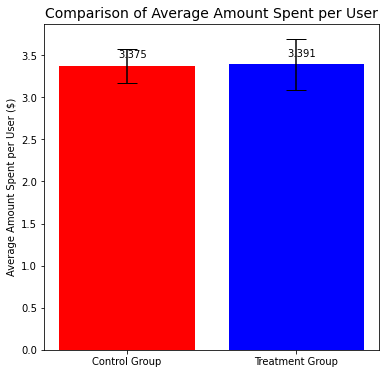

In [9]:
#plot the average amount spent per user for the control and treatment groups graph
#import matplotlib.pyplot as plt

control_group = 3.375
treatment_group = 3.391
control_error = 0.2
treatment_error = 0.3

plt.figure(figsize=(6, 6))

# add error bars to the bars using the yerr parameter in the bar function
plt.bar(['Control Group', 'Treatment Group'], [control_group, treatment_group], yerr=[control_error, treatment_error], capsize=10,color=['red', 'blue'])

#plt.xlabel('Group')
plt.ylabel('Average Amount Spent per User ($)')
plt.title('Comparison of Average Amount Spent per User',size = 14)

# add numbers to each bar
plt.text(-0.05, control_group + 0.1, str(control_group))
plt.text(0.95, treatment_group + 0.1, str(treatment_group))

# remove grids
plt.grid(b=False, axis='both')

plt.show()



2). What is the 95% confidence interval for the average amount spent per user in the control?

In [10]:
#Group by & fillter control data
#Creating a subset of a golbox dataframe based on a control group - A as C_Group
#and then grouping the resulting data by the user_id column and calculating the sum of the total_spent column for control group - A

C_Group=golbox[golbox['user_group'].isin(['A'])]

control_data = C_Group.groupby(by="user_id")["total_spent"].sum()

# this control_data is useful for calculating sample size, sample mean, and sample standard deviation for the control group(A)


In [11]:
# Calculate the sample size, sample mean, and sample standard deviation for the control group(A)
# We are using a one-sample t-interval for means.

n_control = len(control_data)
mean_control = control_data.mean()
std_dev_control = control_data.std(ddof=1)

# Calculate the standard error of the mean
std_error_control = std_dev_control / (n_control ** 0.5)

# Calculate the t-score based on the 95% confidence level and degrees of freedom
t_score = stats.t.ppf(0.975, df=n_control-1)

# Calculate the margin of error
margin_of_error = t_score * std_error_control

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_control - margin_of_error
upper_bound = mean_control + margin_of_error

#Print the 95% confidence interval for the average amount spent per user in the control group
print("95% confidence interval for the average amount spent per user in the control group: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


95% confidence interval for the average amount spent per user in the control group: [3.049, 3.700]


3).What is the 95% confidence interval for the average amount spent per user in the treatment?


In [12]:
#Group by & fillter treatment data
#Creating a subset of a golbox dataframe based on a treatment group - B as T_Group
#and then grouping the resulting data by the user_id column and calculating the sum of the total_spent column for treatment group- B

T_Group=golbox[golbox['user_group'].isin(['B'])]

test_data = T_Group.groupby(by="user_id")["total_spent"].sum()

# this treatment data is useful for calculating sample size, sample mean, and sample standard deviation for the treatment group(B)


In [13]:
# Calculate the sample size, sample mean, and sample standard deviation for the treatment group(B)
# We are using a one-sample t-interval for means.

n_test = len(test_data)
mean_test = test_data.mean()
std_dev_test = test_data.std(ddof=1)

# Calculate the standard error of the mean
std_error_test = std_dev_test / (n_test ** 0.5)

# Calculate the t-score based on the 95% confidence level and degrees of freedom
t_score = stats.t.ppf(0.975, df=n_test-1)

# Calculate the margin of error
margin_of_error = t_score * std_error_test

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_test  - margin_of_error
upper_bound = mean_test  + margin_of_error

#Print the 95% confidence interval for the average amount spent per user in the treatment group
print("95% confidence interval for the average amount spent per user in the treatment group: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


95% confidence interval for the average amount spent per user in the treatment group: [3.073, 3.708]


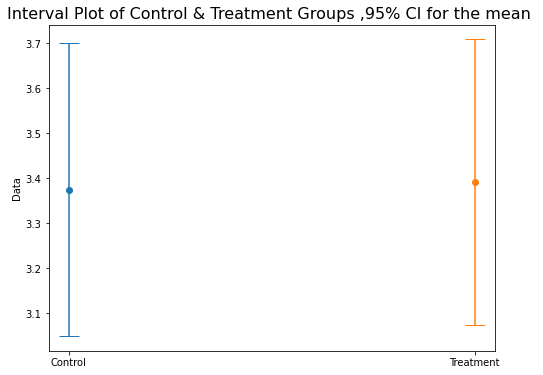

In [14]:
#Plot Interval Plot for Control and Tratment groups
#import matplotlib.pyplot as plt

# Confidence intervals
control_ci = [3.049, 3.700]
treatment_ci = [3.073, 3.708]

# Create a larger plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the control group interval
ax.errorbar(x=0, y=(control_ci[0]+control_ci[1])/2, xerr=None, yerr=(control_ci[1]-control_ci[0])/2, 
            fmt='o', capsize=10, label='Control')

# Plot the treatment group interval
ax.errorbar(x=1, y=(treatment_ci[0]+treatment_ci[1])/2, xerr=None, yerr=(treatment_ci[1]-treatment_ci[0])/2, 
            fmt='o', capsize=10, label='Treatment')

# Set the x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Control', 'Treatment'])

# Remove background grids
ax.grid(False)

# Add a title and y-axis label
ax.set_title('Interval Plot of Control & Treatment Groups ,95% CI for the mean ',size = 16)
ax.set_ylabel('Data')

# Add a legend
#ax.legend()

# Show the plot
plt.show()


4).Conduct a hypothesis test to see whether there is a difference in the average amount spent per user between the two groups. 
What are the resulting p-value and conclusion?

In [15]:
# Perform a two-sample t-test assuming unequal variances

t_stat, p_value = stats.ttest_ind(control_data, test_data , equal_var=False)

# Print the p-value
print('The p-value is:', p_value)

# Compare the p-value to the significance level
if p_value < 0.05:
    print('Statistically significant, Reject the the null hypothesis that there is no difference in the mean amount spent per user between the Control and Treatment.')
else:
    print('Statistically insignificant, Fail to reject the null hypothesis that there is no difference in the mean amount spent per user between the Control and Treatment.')

The p-value is: 0.9438557531728754
Statistically insignificant, Fail to reject the null hypothesis that there is no difference in the mean amount spent per user between the Control and Treatment.


5). What is the 95% confidence interval for the difference in the average amount spent per user between the treatment and the control (treatment-control)?

In [16]:
# Calculate the standard error of the difference
std_error_diff = ((std_dev_control ** 2 / n_control) + (std_dev_test ** 2 / n_test)) ** 0.5

# Calculate the t-score based on the 95% confidence level and degrees of freedom
t_score = stats.t.ppf(0.975, df=n_control+n_test-2)

# Calculate the margin of error
margin_of_error_diff = t_score * std_error_diff

# Calculate the confidence interval
CI_diff = (group_avg_spent_per_user ['B'] - group_avg_spent_per_user ['A'] - margin_of_error_diff, group_avg_spent_per_user ['B'] - group_avg_spent_per_user ['A'] + margin_of_error_diff)

# Print the confidence interval
print("The 95% confidence interval for the difference in the average amount spent per user between the treatment and the control is:", CI_diff)


The 95% confidence interval for the difference in the average amount spent per user between the treatment and the control is: (-0.438998387111909, 0.47099838711190906)


6). What is the user conversion rate for the control and treatment groups?

In [17]:
#Count the number of unique users in each group
control_users_uni = set(golbox[golbox['user_group'] == 'A']['user_id'].unique())
treatment_users_uni = set(golbox[golbox['user_group'] == 'B']['user_id'].unique())

#Count the number of users who made a purchase in each group
control_spents = set(golbox[(golbox['user_group'] == 'A') & (golbox['total_spent'] > 0)]['user_id'].unique())
treatment_spents = set(golbox[(golbox['user_group'] == 'B') & (golbox['total_spent'] > 0)]['user_id'].unique())

#Calculate the user conversion rate for each group
control_conversion_rate = len(control_spents)*100 / len(control_users_uni)
treatment_conversion_rate = len(treatment_spents) *100/ len(treatment_users_uni)

#Print the user conversion rate for each group
print("User conversion rate for the control group %: ", control_conversion_rate)
print("User conversion rate for the treatment group % : ", treatment_conversion_rate)

User conversion rate for the control group %:  3.9230990428459926
User conversion rate for the treatment group % :  4.630081300813008


C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\786583314.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis='both')


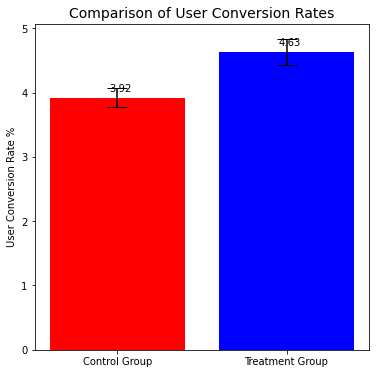

In [18]:
#plot the user conversion rate for the control and treatment groups
import matplotlib.pyplot as plt

control_group = 3.92
treatment_group = 4.63
control_error = 0.15
treatment_error = 0.2

plt.figure(figsize=(6, 6))

# add error bars inside the bars using the yerr and bottom parameters in the bar function
plt.bar(['Control Group', 'Treatment Group'], [control_group, treatment_group], yerr=[control_error, treatment_error], capsize=10, bottom=[0, 0],color=['red', 'blue'])

#plt.xlabel('Group')
plt.ylabel('User Conversion Rate %')
plt.title('Comparison of User Conversion Rates',size = 14)


plt.text(-0.05, control_group + 0.1, str(control_group))
plt.text(0.95, treatment_group + 0.1, str(treatment_group))


# remove grids
plt.grid(b=False, axis='both')

plt.show()



7). What is the 95% confidence interval for the conversion rate of users in the control?

In [19]:
# Count the number of unique users in the control group
control_sample_size = len(control_users_uni)

# Count the number of users who converted in the control group
converted_control = len(control_spents)

# Calculate the conversion rate in the control group
conversion_rate_for_control = converted_control / control_sample_size

# Calculate the standard error of the conversion rate
SE_control = np.sqrt(conversion_rate_for_control * (1 - conversion_rate_for_control) / control_sample_size)

# Calculate the 95% confidence interval using the normal distribution
ci_control = (conversion_rate_for_control - st.norm.ppf(0.975) * SE_control, conversion_rate_for_control + st.norm.ppf(0.975) * SE_control)

# Print the 95% confidence interval for the conversion rate in the control group
print("95% confidence interval for the conversion rate in the control group: ", ci_control)


95% confidence interval for the conversion rate in the control group:  (0.036792139975547034, 0.04166984088137282)


8) .What is the 95% confidence interval for the conversion rate of users in the treatment?

In [20]:
# Count the number of unique users in the test group
test_sample_size = len(treatment_users_uni)

# Count the number of users who converted in the test group
converted_treatment = len(treatment_spents)

# Calculate the conversion rate in the test group
conversion_rate_for_test = converted_treatment / test_sample_size

# Calculate the standard error of the conversion rate
SE_treatment = np.sqrt(conversion_rate_for_test * (1 - conversion_rate_for_test) / test_sample_size)

# Calculate the 95% confidence interval using the normal distribution
ci_treatment = (conversion_rate_for_test - st.norm.ppf(0.975) * SE_treatment, conversion_rate_for_test + st.norm.ppf(0.975) * SE_treatment)

# Print the 95% confidence interval for the conversion rate in the test group
print("95% confidence interval for the conversion rate in the treatment group: ", ci_treatment)

95% confidence interval for the conversion rate in the treatment group:  (0.043674898684431224, 0.04892672733182894)


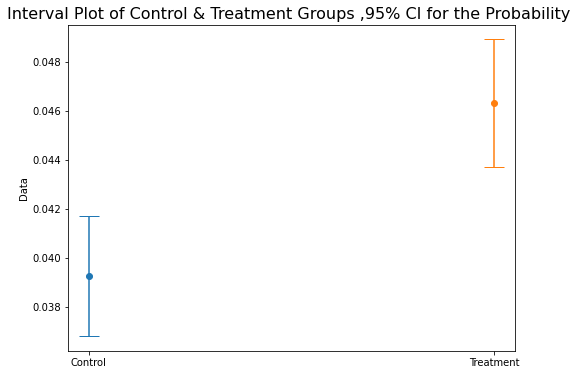

In [21]:
import matplotlib.pyplot as plt

# Confidence intervals
control_ci = [0.0368, 0.0417]
treatment_ci = [0.0437, 0.0489]

# Create a larger plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the control group interval
ax.errorbar(x=0, y=(control_ci[0]+control_ci[1])/2, xerr=None, yerr=(control_ci[1]-control_ci[0])/2, 
            fmt='o', capsize=10, label='Control')

# Plot the treatment group interval
ax.errorbar(x=1, y=(treatment_ci[0]+treatment_ci[1])/2, xerr=None, yerr=(treatment_ci[1]-treatment_ci[0])/2, 
            fmt='o', capsize=10, label='Treatment')

# Set the x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Control', 'Treatment'])

# Remove background grids
ax.grid(False)

# Add a title and y-axis label
ax.set_title('Interval Plot of Control & Treatment Groups ,95% CI for the Probability ',size = 16)
ax.set_ylabel('Data')

# Add a legend
#ax.legend()

# Show the plot
plt.show()


9).Conduct a hypothesis test to see whether there is a difference in the conversion rate between the two groups. 
   What are the resulting p-value and conclusion?

In [22]:
# Calculate the pooled proportion
P_hat = (converted_control + converted_treatment) / (control_sample_size + test_sample_size)

# Calculate the standard error using the pooled proportion
SE_pooled = np.sqrt(P_hat* (1 - P_hat) * (1/control_sample_size + 1/test_sample_size))

# Calculate the test statistic
z = (conversion_rate_for_control - conversion_rate_for_test) / SE_pooled

# Calculate the p-value
p_value = 2 * (1 - st.norm.cdf(abs(z)))

# Print the p-value
print("p-value:", p_value)

# Make a decision based on the p-value and significance level
if p_value < 0.05:
    print("Statistically significant, Reject the null hypothesis that there is no difference in the user conversion rate between Control and Treatment")
else:
    print("Statistically insignificant, Fail to reject the null hypothesis that there is no difference in the user conversion rate between Control and Treatment")

p-value: 0.00011141198532937935
Statistically significant, Reject the null hypothesis that there is no difference in the user conversion rate between Control and Treatment


10).What is the 95% confidence interval for the difference in the conversion rate between the treatment and control (treatment-control)?

In [23]:
#Use the normal distribution and unpooled proportions for the standard error
# Calculate the difference in conversion rates
DIF_conversion_rate = conversion_rate_for_test - conversion_rate_for_control

# Calculate the standard error of the difference in conversion rates
SE_diff = np.sqrt((conversion_rate_for_test  * (1 - conversion_rate_for_test) / test_sample_size) + (conversion_rate_for_control * (1 - conversion_rate_for_control) / control_sample_size))

# Calculate the 95% confidence interval using the normal distribution and unpooled proportions
ci_diff = (DIF_conversion_rate - st.norm.ppf(0.975) * SE_diff, DIF_conversion_rate + st.norm.ppf(0.975) * SE_diff)

# Print the 95% confidence interval for the difference in conversion rates
print("95% confidence interval for the difference in conversion rate between the treatment and control: ", ci_diff)


95% confidence interval for the difference in conversion rate between the treatment and control:  (0.0034860511629807105, 0.0106535939963596)


Part II

Segment Analysis


1).Gender Analysis for Control & Treatment groups

In [24]:
# gender wise Anlysis 

#We can analyze the distribution of the 'gender' column. Assuming the DataFrame represents our entire population, the gender split seems to be equally proportions male to female. 
#If we take a random sample of 3000 or above observations using the pandas calculations and analyze the gender distribution, we also see that it's 50/50. 
#Not surprisingly, this will be the case for other attributes as well which allows us to generalize. 
#our inferences to the rest of the population.

# Gender counts and rates for unique user_ids,

gender_counts = golbox.groupby("gender")["user_id"].nunique()
gender_rates_unique_users = gender_counts *100 / unique_users 
gender_rates = gender_rates_unique_users.round(2)

gender_counts = pd.DataFrame(gender_counts).reset_index()
gender_rates  = pd.DataFrame(gender_rates).reset_index()

print("Total counts: ", gender_counts)

print("percentage : ", gender_rates)


Total counts:    gender  user_id
0      F    20130
1      M    20289
2      O     1669
percentage :    gender  user_id
0      F    41.13
1      M    41.45
2      O     3.41


2). Conversion Rate by Gender

In [25]:
# Identify how many males, females and non-binary categoies were randamly selected to the control & treatment groups 

# Total number of unique users in each group according to gender wise
gender_wise_user_counts = golbox.groupby(['gender','user_group'])["user_id"].nunique().reset_index()

# Creating gender_wise_data dataframe
gender_wise_data = pd.DataFrame(gender_wise_user_counts)

# Rename user_id column to Total_users column 
gender_wise_data = gender_wise_data.rename(columns = {'user_id':'Total_users'})


In [26]:
# Total number of unique users in each group in gender wise who made the purcahses 
gender_wise_spents= golbox[golbox['total_spent']> 0].groupby(["gender","user_group"])["user_id"].nunique().reset_index()

# Create a dataframe
gender_wise_spents = pd.DataFrame(gender_wise_spents)

# Add new colomn to df-gender_wise_data
gender_wise_data['Coverted_users_g'] = gender_wise_spents['user_id']

In [27]:
#  calculate the Conversion_rates_gender_wise 
Conversion_rates_gender_wise = gender_wise_data['Coverted_users_g']*100/gender_wise_data["Total_users"]

In [28]:
# Add new colomn to df-gender_wise_counts as Conversion_rates_gender_wise 
gender_wise_data['Conversion_rates_gender_wise %'] = Conversion_rates_gender_wise.round(2)

# Dataframe - gender wise data
df_gd = gender_wise_data
# print the table
dfi.export(df_gd, 'gender_wise_data.png')

df_gd

,gender,user_group,Total_users,Coverted_users_g,Conversion_rates_gender_wise %
0,F,A,10069,518,5.14
1,F,B,10061,547,5.44
2,M,A,10054,264,2.63
3,M,B,10235,388,3.79
4,O,A,808,26,3.22
5,O,B,861,26,3.02


Summary

*The control group (A) has 10,069 female users, 518 converted with a conversion rate of 5.14%
*The treatment group (B) has 10,061 female users, 547 converted with a conversion rate of 5.44%

*The control group (A) has 10,054 male users, 264 converted with a conversion rate of 2.63%
*The treatment group (B) has 10,235 male users, 388 converted with a conversion rate of 3.79%

*The control group (A) has 808 non-binary users, 26 converted with a conversion rate of 3.22%
*The treatment group (B) has 861 non-binary users, 26 converted with a conversion rate of 3.02%

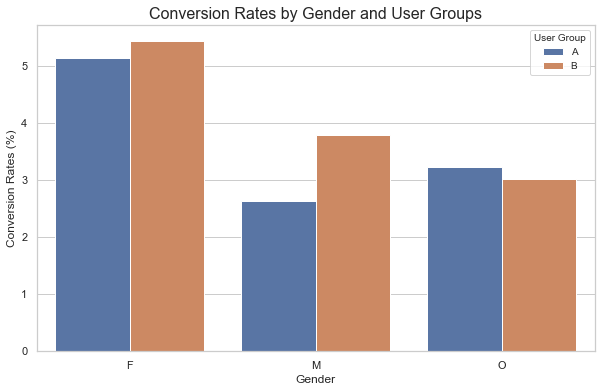

In [29]:
# Gerder wise conversion rates bar graph
#import seaborn as sns
#import matplotlib.pyplot as plt

#  DataFrame is "df_gd"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_gd, x="gender", y="Conversion_rates_gender_wise %", hue="user_group")
ax.set_title("Conversion Rates by Gender and User Groups", fontsize=16)
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Conversion Rates (%)", fontsize=12)
plt.legend(title="User Group", title_fontsize=10, fontsize=10)
plt.show()

3. Identify what kind of device that users were utilized to see the website/banner and Device wise conversion rates

In [30]:
# Identify what kind of device that users were utilized to see the website/banner
# user device A = android * I = iOS

# Total number of unique users counts in each group according to device wise
device_counts = golbox.groupby(['user_device','user_group'])["user_id"].nunique().reset_index()

# create dataframe 
device_counts_data = pd.DataFrame(device_counts)

# rename user_id column to Total_devices column 
device_counts_data =device_counts.rename(columns = {'user_id':'Total_devices'})

device_counts_data

,user_device,user_group,Total_devices
0,A,A,15054
1,A,B,15235
2,I,A,9142
3,I,B,9218


In [31]:
# Total number of unique users in each group according to devices wise that, who made the purcahses 
device_wise_user_spents= golbox[golbox['total_spent']> 0].groupby(["user_device","user_group"])["user_id"].nunique().reset_index()

# Create a dataframe
device_wise_user_spents = pd.DataFrame(device_wise_user_spents)

# Add new colomn to df-device_counts_data
device_counts_data['Coverted_users_d'] = device_wise_user_spents["user_id"]

device_counts_data

,user_device,user_group,Total_devices,Coverted_users_d
0,A,A,15054,417
1,A,B,15235,537
2,I,A,9142,535
3,I,B,9218,596


In [32]:
# Calculating the conversion rate 
Conversion_rates_device_wise = device_counts_data["Coverted_users_d"]*100/device_counts_data["Total_devices"]
Conversion_rates_device_wise                                                                                 

0    2.770028
1    3.524778
2    5.852111
3    6.465611
dtype: float64

In [33]:
# Add new colomn to df-device_counts_data as Conversion_rates_device_wise % 
device_counts_data['Conversion_rates_device_wise %'] = Conversion_rates_device_wise .round(2)

df_DD = device_counts_data
# print the table
dfi.export(df_DD, 'device_counts_data.png')
df_DD    

,user_device,user_group,Total_devices,Coverted_users_d,Conversion_rates_device_wise %
0,A,A,15054,417,2.77
1,A,B,15235,537,3.52
2,I,A,9142,535,5.85
3,I,B,9218,596,6.47


Summary

*The control group (A) has 15,054 Android users, 417 converted with a conversion rate of 2.77% 
*The treatment group (B) has 15,235 Android users, 537 converted with a conversion rate of 3.52%

*The control group (A) has 9,142 iOS users, 535 converted with a conversion rate of 5.85% 
*The treatment group (B) has 9,218 iOS users, 596 converted with a conversion rate of 6.47%



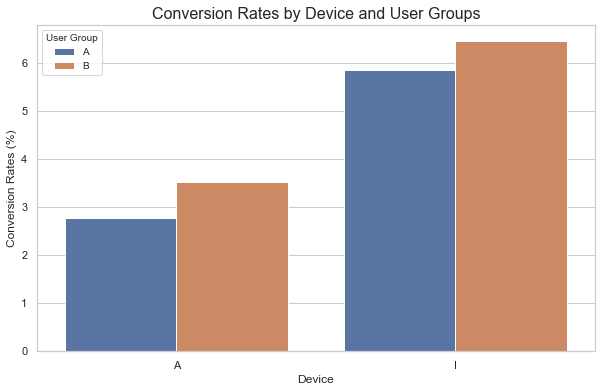

In [34]:
# Device wise conversion rates bar graph
#import seaborn as sns
#import matplotlib.pyplot as plt

#  DataFrame is "df_DD"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_DD , x="user_device", y="Conversion_rates_device_wise %", hue="user_group")
ax.set_title("Conversion Rates by Device and User Groups", fontsize=16)
ax.set_xlabel("Device", fontsize=12)
ax.set_ylabel("Conversion Rates (%)", fontsize=12)
plt.legend(title="User Group", title_fontsize=10, fontsize=10)
plt.show()

3. How many unique users saw the banner/landing page each day and purchases per day /
   Daily user conversion rates

In [35]:
# Aggreage unique users that see the banner by date

daily_users = golbox.groupby(["user_join_date"])["user_id"].nunique()

df_DU = pd.DataFrame(daily_users).reset_index()

# How many users among all users have made the purchases

spent_users = golbox[golbox['total_spent']> 0].groupby(["user_join_date"])["user_id"].nunique()

df_SU = pd.DataFrame(spent_users).reset_index()

print(df_DU)
print(df_SU)


   user_join_date  user_id
0      2023-01-25    11646
1      2023-01-26     8270
2      2023-01-27     6043
3      2023-01-28     4543
4      2023-01-29     3567
5      2023-01-30     2894
6      2023-01-31     2392
7      2023-02-01     2057
8      2023-02-02     1803
9      2023-02-03     1650
10     2023-02-04     1468
11     2023-02-05     1336
12     2023-02-06     1274
   user_join_date  user_id
0      2023-01-25      494
1      2023-01-26      362
2      2023-01-27      267
3      2023-01-28      212
4      2023-01-29      143
5      2023-01-30      120
6      2023-01-31       96
7      2023-02-01       84
8      2023-02-02       71
9      2023-02-03       69
10     2023-02-04       61
11     2023-02-05       52
12     2023-02-06       63


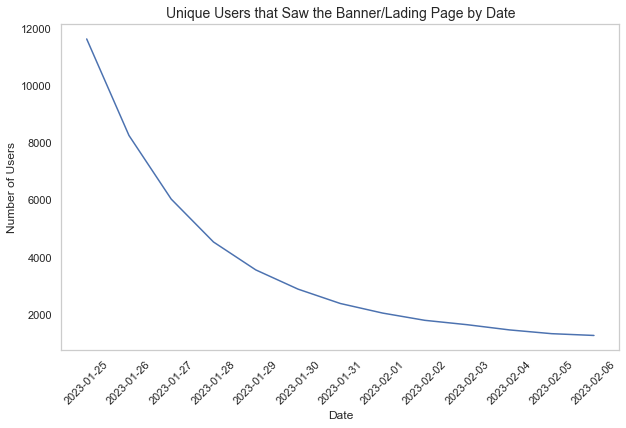

In [36]:
# Line chart for daily users
#import pandas as pd
#import matplotlib.pyplot as plt

# df_DU  is the dataframe containing the data
df_DU = pd.DataFrame(daily_users).reset_index()

# Plotting the line chart
fig, ax = plt.subplots(figsize=(10, 6))  # increase the plot size
ax.plot(daily_users.index, daily_users.values)
ax.set_title("Unique Users that Saw the Banner/Lading Page by Date",size = 14)
ax.set_xlabel("Date",size= 12)
ax.set_ylabel("Number of Users",size= 12)
ax.tick_params(axis='x', rotation=45)  # rotate x axis labels
ax.grid(False)  # remove grid lines

plt.show()


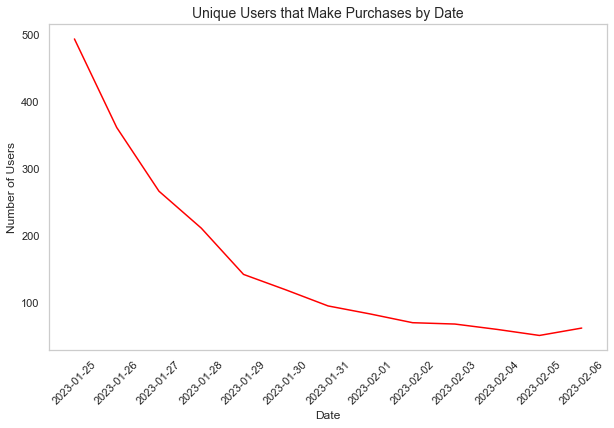

In [37]:
# Line chart for daily spent users
#import pandas as pd
#import matplotlib.pyplot as plt

#  df_SU use for plot the graph
df_SU = pd.DataFrame(spent_users).reset_index()

# Plotting the line chart
fig, ax = plt.subplots(figsize=(10, 6))  # increase the plot size
ax.plot(spent_users.index, spent_users.values,color='red')
ax.set_title("Unique Users that Make Purchases by Date",size = 14)
ax.set_xlabel("Date",size = 12)
ax.set_ylabel("Number of Users", size =12)
ax.tick_params(axis='x', rotation=45)  # rotate x axis labels
ax.grid(False)  # remove grid lines

plt.show()

In [38]:
# Calculate the daily conversion rates for both user types, A and B

# Conversion rates 
Conversion_rates_date_wise = spent_users*100/daily_users 
# Create dataframe
Date_wise_conversion_rates = pd.DataFrame(Conversion_rates_date_wise)

# Rename user_id column as Conversion_percentages % column 
Date_wise_conversion_rates =Date_wise_conversion_rates.rename(columns = {'user_id':'Conversion_percentages %'}).reset_index().round(2)
Date_wise_conversion_rates

,user_join_date,Conversion_percentages %
0,2023-01-25,4.24
1,2023-01-26,4.38
2,2023-01-27,4.42
3,2023-01-28,4.67
4,2023-01-29,4.01
5,2023-01-30,4.15
6,2023-01-31,4.01
7,2023-02-01,4.08
8,2023-02-02,3.94
9,2023-02-03,4.18


In [39]:
# Fixing indexes by using .reset_index()
daily_users = pd.DataFrame(daily_users).reset_index()
spent_users = pd.DataFrame(spent_users).reset_index()
daily_users
spent_users

,user_join_date,user_id
0,2023-01-25,494
1,2023-01-26,362
2,2023-01-27,267
3,2023-01-28,212
4,2023-01-29,143
5,2023-01-30,120
6,2023-01-31,96
7,2023-02-01,84
8,2023-02-02,71
9,2023-02-03,69


In [40]:
# Add new colomns to df-Date_wise_conversion_rates table
Date_wise_conversion_rates["Total_users_by_day"] = daily_users["user_id"]

Date_wise_conversion_rates["Spent_users_by_day"] = spent_users["user_id"]

Date_wise_conversion_rates =Date_wise_conversion_rates.rename(columns = {'user_join_date':'Date'})

Date_wise_conversion_rates=Date_wise_conversion_rates.loc[:,["Date",'Total_users_by_day','Spent_users_by_day','Conversion_percentages %']]
df_DWCR = Date_wise_conversion_rates
df_DWCR

,Date,Total_users_by_day,Spent_users_by_day,Conversion_percentages %
0,2023-01-25,11646,494,4.24
1,2023-01-26,8270,362,4.38
2,2023-01-27,6043,267,4.42
3,2023-01-28,4543,212,4.67
4,2023-01-29,3567,143,4.01
5,2023-01-30,2894,120,4.15
6,2023-01-31,2392,96,4.01
7,2023-02-01,2057,84,4.08
8,2023-02-02,1803,71,3.94
9,2023-02-03,1650,69,4.18


In [41]:
df_DWCR["Spent_users_by_day"].sum()

2094

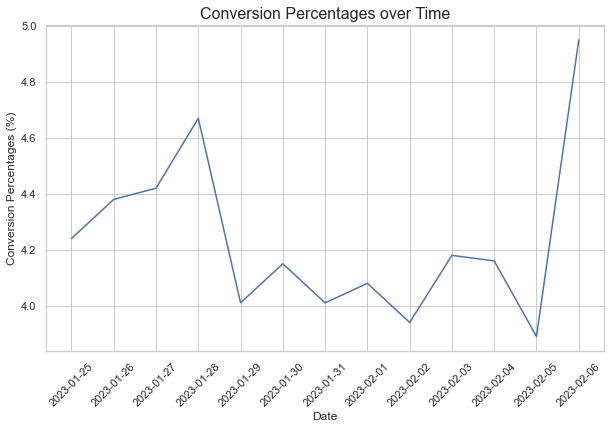

In [42]:
# Plot the Conversion Percentages over Time graph
#import matplotlib.pyplot as plt
#import seaborn as sns

# Create a figure object with a larger size
fig = plt.figure(figsize=(10, 6))

# Plot the line chart
sns.lineplot(data=df_DWCR, x="Date", y="Conversion_percentages %")

# Set the title and axis labels with larger fonts
plt.title("Conversion Percentages over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Conversion Percentages (%)", fontsize=12)

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

4. Group wise conversion rates by each dates

In [43]:
# Total number of unique user counts in each group (control or treatment) who made the purcahses

Group_wise_daily_spents= golbox[golbox['total_spent']> 0].groupby(["user_join_date","user_group"])["user_id"].nunique().reset_index()
Group_wise_daily_spents

,user_join_date,user_group,user_id
0,2023-01-25,A,226
1,2023-01-25,B,268
2,2023-01-26,A,158
3,2023-01-26,B,204
4,2023-01-27,A,125
5,2023-01-27,B,142
6,2023-01-28,A,110
7,2023-01-28,B,102
8,2023-01-29,A,65
9,2023-01-29,B,78


In [44]:
Group_wise_daily_spents["user_id"].sum()

2094

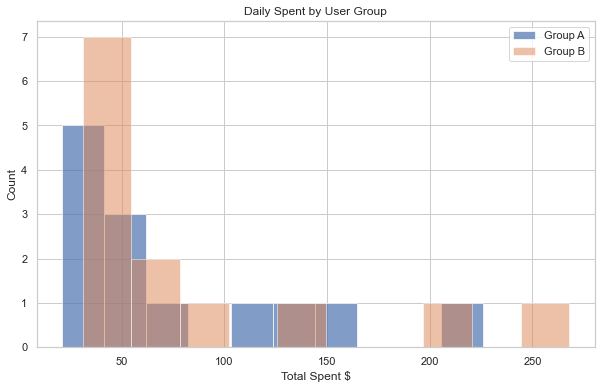

In [45]:
#import matplotlib.pyplot as plt
#Plot the daily spent users both group "A" and "B"
fig = plt.figure(figsize=(10, 6))

plt.title("Daily Spent by User Group")
plt.xlabel("Total Spent $")
plt.ylabel("Count")

Group_wise_daily_spents[Group_wise_daily_spents["user_group"]=="A"]["user_id"].hist(alpha=0.7)
Group_wise_daily_spents[Group_wise_daily_spents["user_group"]=="B"]["user_id"].hist(alpha=0.5)
plt.legend(["Group A", "Group B"])

plt.show()


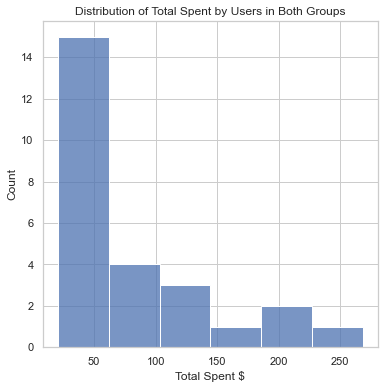

In [46]:
# Plot the histogram for total purchases of Both Control(A) and Treatment(B) group
#import seaborn as sns
#import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 6))

# Create histogram
sns.histplot(data=Group_wise_daily_spents, x="user_id")

# Add title and axis labels
plt.title("Distribution of Total Spent by Users in Both Groups")
plt.xlabel("Total Spent $")
plt.ylabel("Count")

# Show the plot
plt.show()

In [47]:
# Filtering only control group users who made purchases
A1 = Group_wise_daily_spents[Group_wise_daily_spents['user_group'] == 'A']

# Filtering only treatment group users who made purchases
B1 = Group_wise_daily_spents[Group_wise_daily_spents['user_group'] == 'B']

# Remane user_id columns in each table and reset the indexes
A1 =A1.rename(columns = {'user_id':'Total_spent_users_A','user_group':'User_group_A'}).reset_index()
B1 =B1.rename(columns = {'user_id':'Total_spent_users_B','user_group':'User_group_B'}).reset_index()

#Df.drop(['A'], axis=1)
A1=A1.drop(['index'],axis=1)

#Df.drop(['B'], axis=1)
B1=B1.drop(['index'],axis=1)

# Create A1 & B1 dataframes
df_A1 = pd.DataFrame(A1)

df_B1 = pd.DataFrame(B1)



In [48]:
df_A1

,user_join_date,User_group_A,Total_spent_users_A
0,2023-01-25,A,226
1,2023-01-26,A,158
2,2023-01-27,A,125
3,2023-01-28,A,110
4,2023-01-29,A,65
5,2023-01-30,A,55
6,2023-01-31,A,42
7,2023-02-01,A,42
8,2023-02-02,A,36
9,2023-02-03,A,29


In [49]:
df_B1

,user_join_date,User_group_B,Total_spent_users_B
0,2023-01-25,B,268
1,2023-01-26,B,204
2,2023-01-27,B,142
3,2023-01-28,B,102
4,2023-01-29,B,78
5,2023-01-30,B,65
6,2023-01-31,B,54
7,2023-02-01,B,42
8,2023-02-02,B,35
9,2023-02-03,B,40


In [50]:
# merge two tables ON 'purchase_date'
df_AB = pd.merge(df_A1, df_B1, on='user_join_date') 
df_AB

,user_join_date,User_group_A,Total_spent_users_A,User_group_B,Total_spent_users_B
0,2023-01-25,A,226,B,268
1,2023-01-26,A,158,B,204
2,2023-01-27,A,125,B,142
3,2023-01-28,A,110,B,102
4,2023-01-29,A,65,B,78
5,2023-01-30,A,55,B,65
6,2023-01-31,A,42,B,54
7,2023-02-01,A,42,B,42
8,2023-02-02,A,36,B,35
9,2023-02-03,A,29,B,40


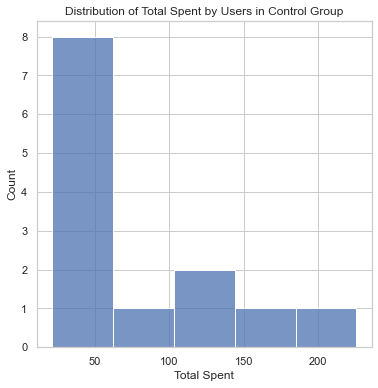

In [51]:
# Plot the histogram for total purchases of Control - A users
#import seaborn as sns
#import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 6))

# Create histogram
sns.histplot(data=df_AB, x="Total_spent_users_A")

# Add title and axis labels
plt.title("Distribution of Total Spent by Users in Control Group")
plt.xlabel("Total Spent")
plt.ylabel("Count")

# Show the plot
plt.show()

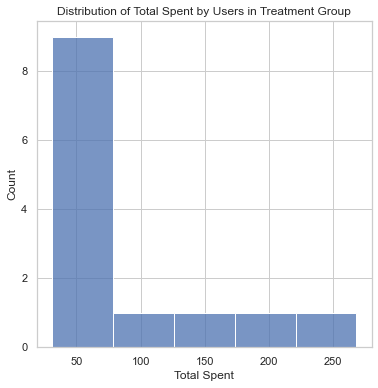

In [52]:
# Plot the histogram for total purchases of Treatment - B users
#import seaborn as sns
#import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 6))

# Create histogram
sns.histplot(data=df_AB, x="Total_spent_users_B")

# Add title and axis labels
plt.title("Distribution of Total Spent by Users in Treatment Group")
plt.xlabel("Total Spent")
plt.ylabel("Count")

# Show the plot
plt.show()

In [53]:
# Drop user_group_A,user_group_B columns 
df_AB=df_AB.drop(['User_group_A'],axis=1)
df_AB=df_AB.drop(['User_group_B'],axis=1)

df_AB

,user_join_date,Total_spent_users_A,Total_spent_users_B
0,2023-01-25,226,268
1,2023-01-26,158,204
2,2023-01-27,125,142
3,2023-01-28,110,102
4,2023-01-29,65,78
5,2023-01-30,55,65
6,2023-01-31,42,54
7,2023-02-01,42,42
8,2023-02-02,36,35
9,2023-02-03,29,40


In [54]:
# add new colum "Total_users_by_day" to df_AB
df_AB["Total_users_by_day"] = df_DWCR["Total_users_by_day"]

df_AB

,user_join_date,Total_spent_users_A,Total_spent_users_B,Total_users_by_day
0,2023-01-25,226,268,11646
1,2023-01-26,158,204,8270
2,2023-01-27,125,142,6043
3,2023-01-28,110,102,4543
4,2023-01-29,65,78,3567
5,2023-01-30,55,65,2894
6,2023-01-31,42,54,2392
7,2023-02-01,42,42,2057
8,2023-02-02,36,35,1803
9,2023-02-03,29,40,1650


In [55]:
# Calculate the conversion rates for each control and treatment group user types in daily basis
df_AB["A users conversion rate by day"] = df_AB["Total_spent_users_A"]*100/df_AB["Total_users_by_day"]
df_AB["B users conversion rate by day"] = df_AB["Total_spent_users_B"]*100/df_AB["Total_users_by_day"]

# remane the purchase_date as "Date"
df_AB =df_AB.rename(columns = {'user_join_date':'Date'})
df_AB = df_AB.round(2) # round to two decimal places 

df_AB


,Date,Total_spent_users_A,Total_spent_users_B,Total_users_by_day,A users conversion rate by day,B users conversion rate by day
0,2023-01-25,226,268,11646,1.94,2.30
1,2023-01-26,158,204,8270,1.91,2.47
2,2023-01-27,125,142,6043,2.07,2.35
3,2023-01-28,110,102,4543,2.42,2.25
4,2023-01-29,65,78,3567,1.82,2.19
5,2023-01-30,55,65,2894,1.90,2.25
6,2023-01-31,42,54,2392,1.76,2.26
7,2023-02-01,42,42,2057,2.04,2.04
8,2023-02-02,36,35,1803,2.00,1.94
9,2023-02-03,29,40,1650,1.76,2.42


In [56]:
(df_AB["Total_spent_users_A"]+df_AB["Total_spent_users_B"]).sum()



2094

In [57]:
df_AB["Total_users_by_day"].sum()

48943

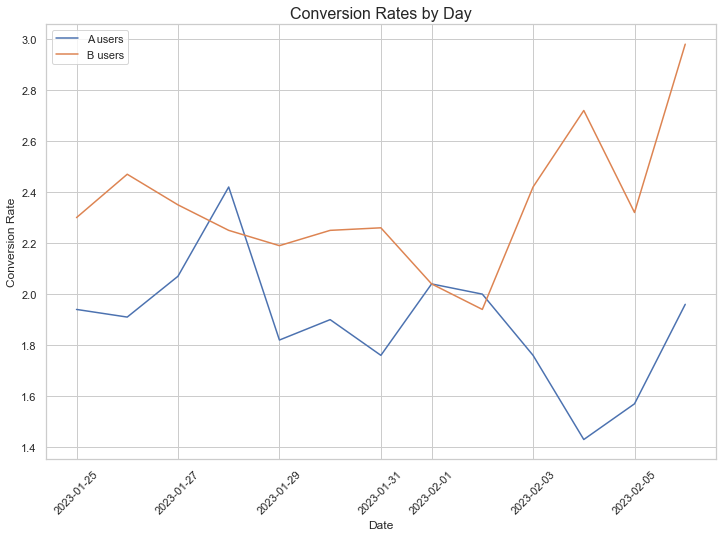

In [58]:
# Plot the daily conversion rates for each user type
#import matplotlib.pyplot as plt 

# Convert the date column to a datetime object
df_AB['Date'] = pd.to_datetime(df_AB['Date'])

# Set figure size
plt.figure(figsize=(12, 8))

# Plot individual lines
plt.plot(df_AB['Date'], df_AB['A users conversion rate by day'], label='A users')
plt.plot(df_AB['Date'], df_AB['B users conversion rate by day'], label='B users')

# Add legend
plt.legend()

# Add title
plt.title('Conversion Rates by Day',size = 16)

# Add axis labels
plt.xlabel('Date', size = 12)
plt.ylabel('Conversion Rate', size =12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display plot
plt.show()




5. Where the users are designated/located at & Conversion rates for each Continent

In [59]:
# Total number of unique users in each group in continent wise
Continent_wise_user_counts = golbox.groupby(['continent','user_group'])["user_id"].nunique().reset_index()

# Create a dataframe
Continent_wise_user_counts = pd.DataFrame(Continent_wise_user_counts)

# Rename user_id column as Total User Counts 
Continent_wise_user_counts = Continent_wise_user_counts.rename(columns = {'user_id':'Total User Counts'})

Continent_wise_user_counts

,continent,user_group,Total User Counts
0,EU,A,5894
1,EU,B,5992
2,Middle_East,A,1849
3,Middle_East,B,1883
4,North America,A,10891
5,North America,B,11189
6,Oceania,A,608
7,Oceania,B,560
8,Others,A,296
9,Others,B,347


In [60]:
Continent_wise_user_counts["Total User Counts"].sum()

48943

In [61]:
# Total number of unique users in each group in continent wise who made the purcahses 
Continent_wise_user_spents= golbox[golbox['total_spent']> 0].groupby(["continent","user_group"])["user_id"].nunique().reset_index()

# Create dataframe
Continent_wise_user_spents = pd.DataFrame(Continent_wise_user_spents)

# Add new colomn to df-Continent_wise_user_spents
Continent_wise_user_counts['Coverted_users_continents'] = Continent_wise_user_spents["user_id"]

Continent_wise_user_counts

,continent,user_group,Total User Counts,Coverted_users_continents
0,EU,A,5894,180
1,EU,B,5992,242
2,Middle_East,A,1849,74
3,Middle_East,B,1883,67
4,North America,A,10891,493
5,North America,B,11189,611
6,Oceania,A,608,13
7,Oceania,B,560,17
8,Others,A,296,16
9,Others,B,347,14


In [62]:
Continent_wise_user_counts["Coverted_users_continents"].sum()

2094

In [63]:
# Calculating the conversion rates for each continent
Conversion_rates_continent_wise = Continent_wise_user_counts['Coverted_users_continents']*100/Continent_wise_user_counts['Total User Counts']

Conversion_rates_continent_wise 

0     3.053953
1     4.038718
2     4.002163
3     3.558152
4     4.526673
5     5.460720
6     2.138158
7     3.035714
8     5.405405
9     4.034582
10    3.725286
11    4.061352
dtype: float64

In [64]:
# Add new colomn to df-Conversion_rates_continent_wise to Continent_wise_user_counts 
Continent_wise_user_counts['Conversion_rates_continenet_wise %'] = Conversion_rates_continent_wise .round(2)

df_CWUC = Continent_wise_user_counts

# print the table
dfi.export(df_CWUC, 'Continent_wise_data.png')

df_CWUC

Unable to enlarge image with Chrome, it is a known bug with version 111 and 112
                    You could try to install an individual Chrome dev version and set chrome_path to it
                    or try 'df.dfi.export('df.png', table_conversion="selenium")'


,continent,user_group,Total User Counts,Coverted_users_continents,Conversion_rates_continenet_wise %
0,EU,A,5894,180,3.05
1,EU,B,5992,242,4.04
2,Middle_East,A,1849,74,4.00
3,Middle_East,B,1883,67,3.56
4,North America,A,10891,493,4.53
5,North America,B,11189,611,5.46
6,Oceania,A,608,13,2.14
7,Oceania,B,560,17,3.04
8,Others,A,296,16,5.41
9,Others,B,347,14,4.03


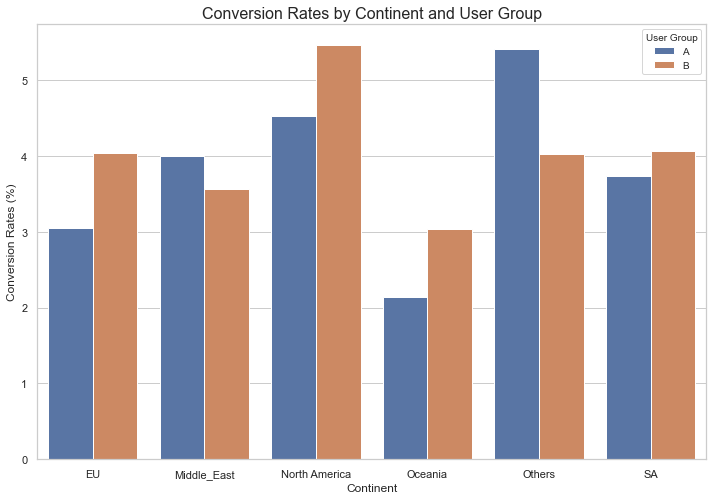

In [65]:
# Plot the Conversion_rates_continenet_wise % graph
#import seaborn as sns
#import matplotlib.pyplot as plt


#DataFrame is "df_CWUC"
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_CWUC, x="continent", y="Conversion_rates_continenet_wise %", hue="user_group")
ax.set_title("Conversion Rates by Continent and User Group", fontsize=16)
ax.set_xlabel("Continent", fontsize=12)
ax.set_ylabel("Conversion Rates (%)", fontsize=12)
plt.legend(title="User Group", title_fontsize=10, fontsize=10)
plt.show()



6. Country wise analysis

In [66]:
df_CWUC

,continent,user_group,Total User Counts,Coverted_users_continents,Conversion_rates_continenet_wise %
0,EU,A,5894,180,3.05
1,EU,B,5992,242,4.04
2,Middle_East,A,1849,74,4.00
3,Middle_East,B,1883,67,3.56
4,North America,A,10891,493,4.53
5,North America,B,11189,611,5.46
6,Oceania,A,608,13,2.14
7,Oceania,B,560,17,3.04
8,Others,A,296,16,5.41
9,Others,B,347,14,4.03


In [67]:
# country wise max,mean,median and sum of purchases 
df_CP = golbox.groupby('country')['total_spent'].agg({'sum','mean','max','std'}).sort_values(by='max', ascending=False)

df_CP = df_CP.round(2)

dfi.export(df_CP, 'Country_data.png')

df_CP

,max,sum,mean,std
country,,,,
DEU,1659.40,11756.87,3.04,31.12
GBR,1546.30,9788.24,3.31,34.67
USA,1266.80,61645.72,4.16,25.50
BRA,1094.80,29636.00,3.14,26.86
MEX,844.70,17694.54,3.08,23.46
TUR,745.80,11500.97,3.07,20.91
FRA,333.79,7637.84,2.47,15.42
ESP,267.80,5393.16,2.70,17.35
CAN,198.60,6134.11,3.90,18.63


Text(0, 0.5, 'Country')

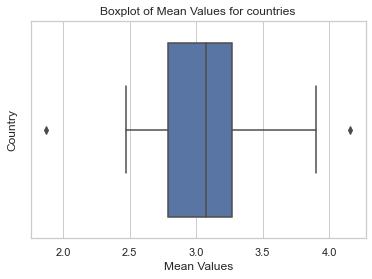

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# "df_CP" is dataframe
sns.boxplot(x=df_CP["mean"])
plt.title("Boxplot of Mean Values for countries")
plt.xlabel("Mean Values")
plt.ylabel("Country")



7. USA, Analysis 

In [69]:
#  Total number of unique users in GBR, and analysis with gender & device used,
df_USA= golbox[golbox['country'] == 'USA'].groupby(["gender","user_device","user_group"])["user_id"].nunique().reset_index()
df_USA = df_USA.rename(columns = {'user_id':'User Counts_USA'}) # remane the column
df_USA

,gender,user_device,user_group,User Counts_USA
0,F,A,A,1845
1,F,A,B,1935
2,F,I,A,1167
3,F,I,B,1081
4,M,A,A,1825
5,M,A,B,1928
6,M,I,A,1161
7,M,I,B,1163
8,O,A,A,153
9,O,A,B,180


In [70]:
df_USA["User Counts_USA"].sum()

12591

In [71]:
# Unique users who made the purcahses in GBR
USA_conversions = golbox[(golbox['total_spent']> 0) & (golbox['country'] == 'USA')].groupby(["gender","user_device","user_group"])["user_id"].nunique().reset_index()

# Create dataframe 
USA_conversions = pd.DataFrame(USA_conversions)

# Remane the column
USA_conversions = USA_conversions.rename(columns = {'user_id':'User spent Counts_USA'})
USA_conversions

# Add new colomn to df_USA table
df_USA['User spent Counts_USA'] = USA_conversions["User spent Counts_USA"]

# Calculate the Conversion_rates_GBR %
df_USA['Conversion_rates_USA %'] = df_USA["User spent Counts_USA"]*100/df_USA["User Counts_USA"]

df_USA = df_USA.round(2)

# print the table
dfi.export(df_USA, 'USA_data.png')

df_USA


Unable to enlarge image with Chrome, it is a known bug with version 111 and 112
                    You could try to install an individual Chrome dev version and set chrome_path to it
                    or try 'df.dfi.export('df.png', table_conversion="selenium")'


,gender,user_device,user_group,User Counts_USA,User spent Counts_USA,Conversion_rates_USA %
0,F,A,A,1845,91,4.93
1,F,A,B,1935,94,4.86
2,F,I,A,1167,93,7.97
3,F,I,B,1081,94,8.70
4,M,A,A,1825,53,2.90
5,M,A,B,1928,83,4.30
6,M,I,A,1161,67,5.77
7,M,I,B,1163,73,6.28
8,O,A,A,153,8,5.23
9,O,A,B,180,3,1.67


In [72]:
df_USA["User spent Counts_USA"].sum()

663

8. AUS Analysis

In [73]:
#  Total number of unique users in AUS, and analysis with gender & device used,
df_AUS = golbox[golbox['country'] == 'AUS'].groupby(["gender","user_device","user_group"])["user_id"].nunique().reset_index()

# Remane the column
df_AUS= df_AUS .rename(columns = {'user_id':'User Counts_AUS'})

# Unique users who made the purcahses in AUS
AUS_conversions = golbox[(golbox['total_spent']> 0) & (golbox['country'] == 'AUS')].groupby(["gender","user_device","user_group"])["user_id"].nunique().reset_index()

# Create dataframe
AUS_conversions = pd.DataFrame(AUS_conversions)

# Remane the column
AUS_conversions = AUS_conversions.rename(columns = {'user_id':'User spent Counts_AUS'})

# add new colomn to df-_AUS
df_AUS['User spent Counts_AUS'] = AUS_conversions["User spent Counts_AUS"]

# Calculate Conversion_rates_AUS %
df_AUS['Conversion_rates_AUS %'] = df_AUS['User spent Counts_AUS']*100/df_AUS["User Counts_AUS"]

df_AUS = df_AUS.round(2)

# print the table
dfi.export(df_AUS, 'AUS_data.png')

df_AUS

Unable to enlarge image with Chrome, it is a known bug with version 111 and 112
                    You could try to install an individual Chrome dev version and set chrome_path to it
                    or try 'df.dfi.export('df.png', table_conversion="selenium")'


,gender,user_device,user_group,User Counts_AUS,User spent Counts_AUS,Conversion_rates_AUS %
0,F,A,A,174,6.0,3.45
1,F,A,B,134,5.0,3.73
2,F,I,A,89,4.0,4.49
3,F,I,B,86,2.0,2.33
4,M,A,A,150,1.0,0.67
5,M,A,B,134,2.0,1.49
6,M,I,A,93,5.0,5.38
7,M,I,B,99,1.0,1.01
8,O,A,A,17,NaN,NaN
9,O,A,B,16,NaN,NaN


9. Turkey Analysis

In [74]:
#  Total number of unique users in France, and analysis with gender & device used,
df_TUR = golbox[golbox['country'] == 'TUR'].groupby(["gender","user_group"])["user_id"].nunique().reset_index()

# Remane the column
df_TUR= df_TUR .rename(columns = {'user_id':'User Counts_TUR'})

# Unique users who made the purcahses in Turkey
TUR_conversions = golbox[(golbox['total_spent']> 0) & (golbox['country'] == 'TUR')].groupby(["gender","user_group"])["user_id"].nunique().reset_index()

# Create dataframe
TUR_conversions = pd.DataFrame(TUR_conversions)

# Remane the column
TUR_conversions = TUR_conversions.rename(columns = {'user_id':'User spent Counts_TUR'})

# add new colomn to df-_FRA
df_TUR['User spent Counts_TUR'] = TUR_conversions["User spent Counts_TUR"]

# Calculate Conversion_rates_FRA %
df_TUR['Conversion_rates_TUR %'] = df_TUR['User spent Counts_TUR']*100/df_TUR["User Counts_TUR"]

df_TUR = df_TUR.round(2)

df_TUR

,gender,user_group,User Counts_TUR,User spent Counts_TUR,Conversion_rates_TUR %
0,F,A,731,43,5.88
1,F,B,785,31,3.95
2,M,A,788,17,2.16
3,M,B,789,20,2.53
4,O,A,49,1,2.04
5,O,B,64,4,6.25


9. Experimental design: power analysis

Effect Size

In [75]:
# Calculate actual standardized effect size
from statsmodels.stats.proportion import proportion_effectsize
effect_size_std = proportion_effectsize(0.04630, 0.03923)
print(effect_size_std)

0.03497256229819473


In [76]:
# Assumption of effect_size_std
effect_size_std = 0.01

Sample size estimation for proportions

In [77]:
#Import power module
from statsmodels.stats import power
# Calculate sample size
sample_size = power.TTestIndPower().solve_power(effect_size=0.01,
power=.80,
alpha=.05,
nobs1=None)
print(sample_size)

156978.1728604922


Effect of sample size and MDE on power

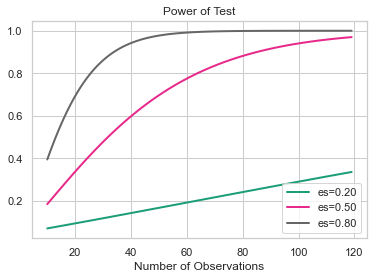

In [78]:
# Import necessary packages
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

# Specify parameters for power analysis
sample_sizes = np.array(range(10, 120))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()


Sample size estimation for means

In [79]:
#Calculate the baseline mean spent value
group_avg_spent = golbox.groupby("user_group")["total_spent"].sum()/golbox.groupby("user_group")["user_id"].nunique()
mean_A = group_avg_spent["A"]
print(mean_A)

3.374518467928841


In [80]:
std_dev_control = control_data.std(ddof=1)
print(std_dev_control)

25.936390557224954


In [81]:
# Specify the desired minimum average purchase value
mean_new =  6

In [82]:
# Calculate the standardized effect size
std_effect_size=(mean_new - mean_A)/std_dev_control

Sample size estimation for means

In [83]:
sample_size = power.TTestIndPower().solve_power(effect_size=std_effect_size,
power=.80,
alpha=.05,
nobs1=None)
print(sample_size)

1532.8868314498084
